In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/ML_Library')

In [3]:
from algorithms.polynomial_regression import PolynomialRegression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
train_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/polynomial_regression_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/polynomial_regression_test.csv')

In [7]:
def perform_eda(data):
        """Performs basic exploratory data analysis."""
        # Basic information
        print("Data Info:")
        print(data.info())

        print("\nBasic Statistics:")
        print(data.describe())

        print("\nMissing Values:")
        print(data.isnull().sum())

        # Visualize distributions
        columns = [col for col in data.columns if col not in ['ID']]
        for column in columns:
            plt.hist(data[column], bins=30, alpha=0.7, color='blue', label=column)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()

        # Correlation matrix
        print("\nCorrelation Matrix:")
        correlation_matrix = data.drop(columns=["ID"]).corr()
        print(correlation_matrix)
        plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
        plt.colorbar()
        plt.title("Correlation Matrix")
        plt.show()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         48000 non-null  int64  
 1   Feature_1  48000 non-null  float64
 2   Feature_2  48000 non-null  float64
 3   Feature_3  48000 non-null  float64
 4   Feature_4  48000 non-null  float64
 5   Feature_5  48000 non-null  float64
 6   Target     48000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.6 MB
None

Basic Statistics:
                 ID     Feature_1     Feature_2     Feature_3     Feature_4  \
count  48000.000000  48000.000000  48000.000000  48000.000000  48000.000000   
mean   24000.500000      0.014624     -0.001115      0.002485      0.000691   
std    13856.550797      1.155884      1.153866      1.153978      1.154967   
min        1.000000     -1.999862     -1.999991     -1.999978     -1.999966   
25%    12000.750000     -0.985856     -1.001639     

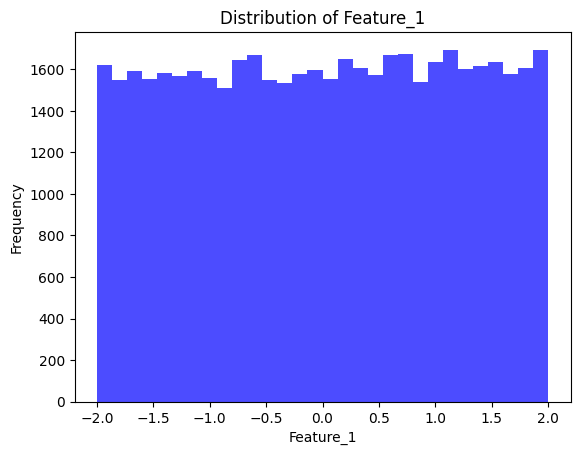

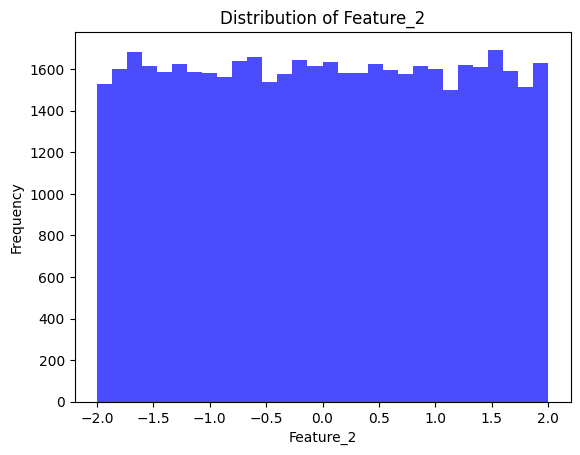

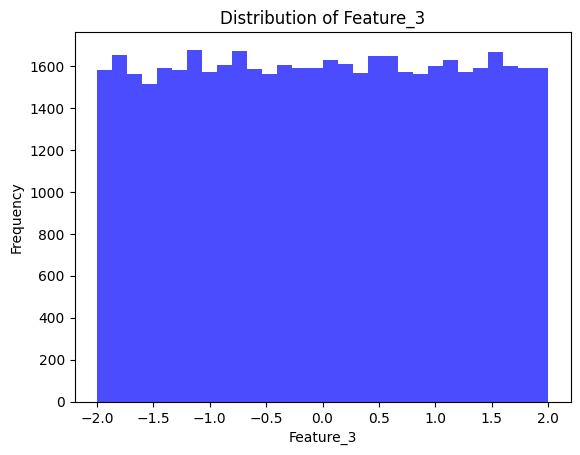

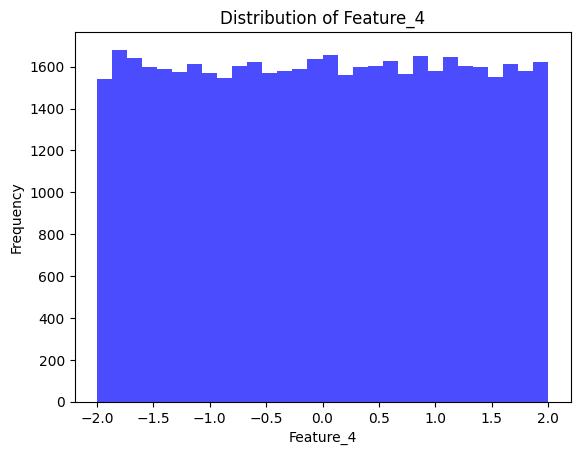

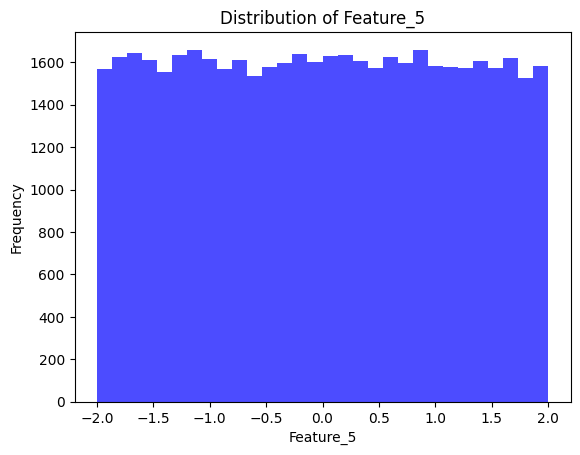

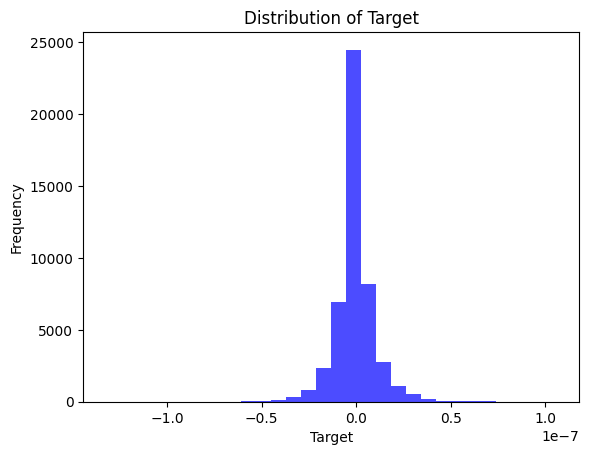


Correlation Matrix:
           Feature_1  Feature_2  Feature_3  Feature_4  Feature_5    Target
Feature_1   1.000000   0.000054   0.002807   0.003584  -0.000683  0.115589
Feature_2   0.000054   1.000000  -0.003008   0.003794   0.003933  0.009536
Feature_3   0.002807  -0.003008   1.000000   0.000987  -0.010281  0.136876
Feature_4   0.003584   0.003794   0.000987   1.000000  -0.003775  0.071769
Feature_5  -0.000683   0.003933  -0.010281  -0.003775   1.000000  0.015557
Target      0.115589   0.009536   0.136876   0.071769   0.015557  1.000000


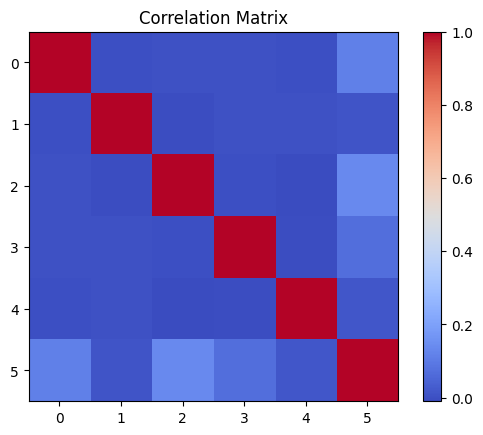

In [8]:
perform_eda(train_data)

In [9]:
X = train_data.drop(columns=['ID', 'Target']).values
y = train_data['Target'].values
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (48000, 5), y shape: (48000,)


In [10]:
model = PolynomialRegression(X, y)
model.create_polynomial_features(degree=2)
model.train_model()

Polynomial features created with degree 2.
Shape of polynomial features: (48000, 10)
Model trained successfully.
Coefficients: [-7.62381120e-11  1.05074197e-09  9.25242213e-11  1.27425822e-09
  6.76658652e-10  1.47566590e-10  3.04060542e-09 -1.58615376e-09
  6.50399538e-10 -3.33518702e-10 -1.98877239e-09]


In [24]:
print(model.coefficients.shape)

(11,)


In [27]:
X_test = test_data.drop(columns=['ID']).values
print(f"X shape: {X.shape}")
print(f"X_test shape: {X_test.shape}")

X shape: (48000, 5)
X_test shape: (12000, 5)


In [28]:
X_test_poly = np.hstack([np.power(X_test, d) for d in range(1, 3)])
X_bias = np.hstack([np.ones((X_test_poly.shape[0], 1)), X_test_poly])
y_test_pred = np.dot(X_bias, model.coefficients)

In [29]:
# Convert y_test_pred to a DataFrame
# Assuming y_test_pred is a NumPy array or list
predictions = pd.DataFrame(y_test_pred, columns=['predicted_label'])

# Save to a CSV file in Google Drive
file_path = '/content/drive/MyDrive/ML_Library/datasets/poly_test_pred.csv'
predictions.to_csv(file_path, index=False)

print(f"Predictions saved to: {file_path}")

Predictions saved to: /content/drive/MyDrive/ML_Library/datasets/poly_test_pred.csv
